In [1]:
import pandas as pd
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
data=[[6.0, 10.0], [5.0, 10.0], [6.0, 9.0], [5.0, 9.0], [5.0, 8.0], [4.0, 6.0], [4.0,9.0], [17.0, 3.0], [7.0, 9.0], [7.0, 10.0], [4.0, 10.0], [16.0, 5.0], [13.0, 2.0],
[16.0, 3.0],[18.0,10.0],[3.0,10.0],[12.0,3.0],[17.0,9.0],[13.0,6.0],[1.0,9.0],[14.0,10.0],[19.0,10.0],[18.0,8.0],[4.0,8.0],[3.0,7.0]]
print('Source points ND: ')
print(data)

Source points ND: 
[[6.0, 10.0], [5.0, 10.0], [6.0, 9.0], [5.0, 9.0], [5.0, 8.0], [4.0, 6.0], [4.0, 9.0], [17.0, 3.0], [7.0, 9.0], [7.0, 10.0], [4.0, 10.0], [16.0, 5.0], [13.0, 2.0], [16.0, 3.0], [18.0, 10.0], [3.0, 10.0], [12.0, 3.0], [17.0, 9.0], [13.0, 6.0], [1.0, 9.0], [14.0, 10.0], [19.0, 10.0], [18.0, 8.0], [4.0, 8.0], [3.0, 7.0]]


In [2]:
def computeN(D,x,e,metrik):
    N=[]    
    for y in range(len(D)):
        curDist=0
        if D[y]!=D[x]:
            if metrik==1:
                for i in range(len(D[y])):
                    curDist+=(D[x][i]-D[y][i])*(D[x][i]-D[y][i])
                curDist=sqrt(curDist)
            if metrik==2:
                for i in range(len(D[y])):
                    curDist+=sqrt(abs(D[x][i]-D[y][i]))
                curDist=curDist*curDist
            if metrik==3:
                temp=[]
                for i in range(len(D[y])):
                    temp.append(abs(D[x][i]-D[y][i]))
                curDist=max(temp)
            if metrik==4:
                temp=[]
                for i in range(len(D[y])):
                    temp.append(abs(D[x][i]-D[y][i]))
                curDist=min(temp)
            if metrik==5:
                for i in range(len(D[y])):
                    curDist+=(2**(i))*(D[x][i]-D[y][i])*(D[x][i]-D[y][i])
                curDist=sqrt(curDist)
            if curDist<=e:
                N.append(D[y])
    return(N)

In [3]:
def indexInD(arr,D):
    for i in range(len(D)):
        if D[i]==arr:
            return i
def densityConnect(x,k,AllN,Core,Id,D):
    temp=AllN.copy()
    for y in AllN[x]:        
        if y!=AllN[x]:          
            
            Id[y]=k            
            if (y in Core):
                temp[x].remove(y)                
                densityConnect(y,k,temp,Core,Id,D)

In [4]:
def DBSCAN(D,e,minpts,metrik):
    Core=[]
    AllN=[]
    Id={}
    for xi in range(len(D)):
        AllN.append(computeN(D,xi,e,metrik))
        Id[xi]=0
        if len(AllN[xi])>=minpts:
            Core.append(xi)
    indN=[]    
    for i in range(len(AllN)):
        indN.append([])
        for j in range(len(AllN[i])):
            indN[i].append(indexInD(AllN[i][j],D))    
    k=0
    for xi in Core:
        if Id[xi]==0:
            k+=1
            Id[xi]=k
            densityConnect(xi,k,indN,Core,Id,D)
    C=[]
    for i in range(k):
        C.append([])
    for i in range(k):
        for x in range(len(D)):
            if Id[x]==i+1:
                C[i].append(x)    
    Noise=[]
    for x in range(len(D)):
        if Id[x]==0:
            Noise.append(x)
    Border=[]
    for x in range(len(D)):
        if (x not in Core) and (x not in Noise):
            Border.append(x)    
    return (C,Core,Noise,Border,k)

In [5]:
def drawDiagram(data,C,N,k):
    colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    CX=[]
    CY=[]
    for i in range(k):
        CX.append([])
        CY.append([])
        for j in C[i]:
            CX[i].append(data[j][0])
            CY[i].append(data[j][1])
    NX=[]
    NY=[]
    for i in N:
        NX.append(data[i][0])
        NY.append(data[i][1])
    for i in range(k):
        temp=i
        curLabel='Cluster ' + str(temp)
        plt.scatter(CX[i],CY[i],c=colors[i],label=curLabel)
    plt.scatter(NX,NY,c=colors[k],marker='*',label='Noise')
    for i in range(len(data)):
        for p in range(k):
            for j in range(len(CX[p])):
                if data[i][0]==CX[p][j] and data[i][1]==CY[p][j]:
                    plt.annotate(i, (data[i][0]-0.1, data[i][1]+0.1))
        for j in range(len(NX)):
            if data[i][0]==NX[j] and data[i][1]==NY[j]:
                plt.annotate(i, (data[i][0]-0.1, data[i][1]+0.1))        
    plt.legend()
    

# 4.1

In [6]:
measure=1
e=2.0
minpts=3.0
C,O,N,B,k=DBSCAN(data,e,minpts,measure)
print('Measure ',measure,', e = ',e,', minPts = ',minpts)
print('Result:')
print('C: ',C)
print('O: ',O)
print('B: ',B)
print('N: ',N)

Measure  1 , e =  2.0 , minPts =  3.0
Result:
C:  [[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 15, 23, 24], [14, 17, 21, 22]]
O:  [0, 1, 2, 3, 4, 6, 8, 9, 10, 14, 15, 23]
B:  [5, 17, 21, 22, 24]
N:  [7, 11, 12, 13, 16, 18, 19, 20]


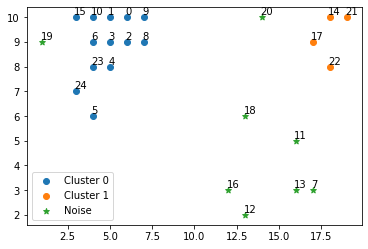

In [7]:
drawDiagram(data,C,N,k)

# 4.2

Measure  2 , e =  3.0 , minPts =  5.0
Result:
C:  [[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 15, 19, 23]]
O:  [0, 1, 3, 6, 10]
B:  [2, 4, 5, 8, 9, 15, 19, 23]
N:  [7, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22, 24]


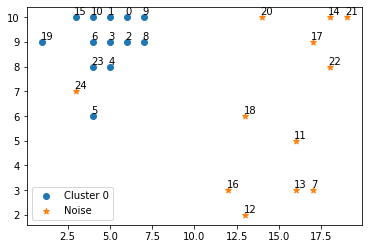

In [8]:
measure=2
e=3.0
minpts=5.0
C,O,N,B,k=DBSCAN(data,e,minpts,measure)
print('Measure ',measure,', e = ',e,', minPts = ',minpts)
print('Result:')
print('C: ',C)
print('O: ',O)
print('B: ',B)
print('N: ',N)
drawDiagram(data,C,N,k)

# 4.3

Measure  3 , e =  1.0 , minPts =  2.0
Result:
C:  [[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 15, 23, 24], [14, 17, 21]]
O:  [0, 1, 2, 3, 4, 6, 8, 9, 10, 14, 15, 17, 23, 24]
B:  [5, 21]
N:  [7, 11, 12, 13, 16, 18, 19, 20, 22]


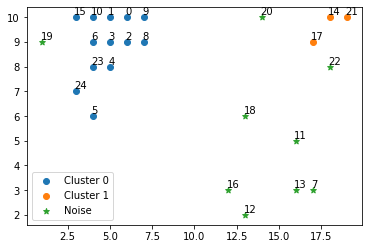

In [9]:
measure=3
e=1.0
minpts=2.0
C,O,N,B,k=DBSCAN(data,e,minpts,measure)
print('Measure ',measure,', e = ',e,', minPts = ',minpts)
print('Result:')
print('C: ',C)
print('O: ',O)
print('B: ',B)
print('N: ',N)
drawDiagram(data,C,N,k)

# 4.4

Measure  4 , e =  3.0 , minPts =  4.0
Result:
C:  [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]]
O:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
B:  []
N:  []


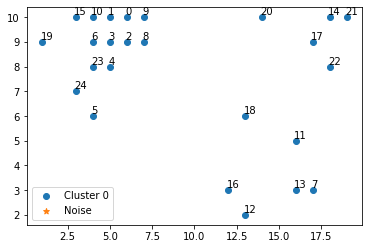

In [10]:
measure=4
e=3.0
minpts=4.0
C,O,N,B,k=DBSCAN(data,e,minpts,measure)
print('Measure ',measure,', e = ',e,', minPts = ',minpts)
print('Result:')
print('C: ',C)
print('O: ',O)
print('B: ',B)
print('N: ',N)
drawDiagram(data,C,N,k)

# 4.5

Measure  5 , e =  3.0 , minPts =  5.0
Result:
C:  [[0, 1, 2, 3, 4, 5, 6, 8, 9, 10, 15, 19, 23, 24]]
O:  [0, 1, 2, 3, 4, 6, 8, 9, 10, 15, 23]
B:  [5, 19, 24]
N:  [7, 11, 12, 13, 14, 16, 17, 18, 20, 21, 22]


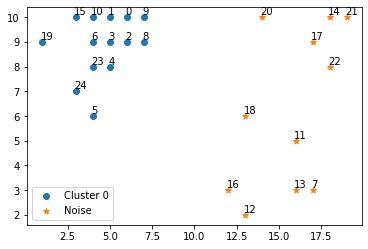

In [11]:
measure=5
e=3.0
minpts=5.0
C,O,N,B,k=DBSCAN(data,e,minpts,measure)
print('Measure ',measure,', e = ',e,', minPts = ',minpts)
print('Result:')
print('C: ',C)
print('O: ',O)
print('B: ',B)
print('N: ',N)
drawDiagram(data,C,N,k)